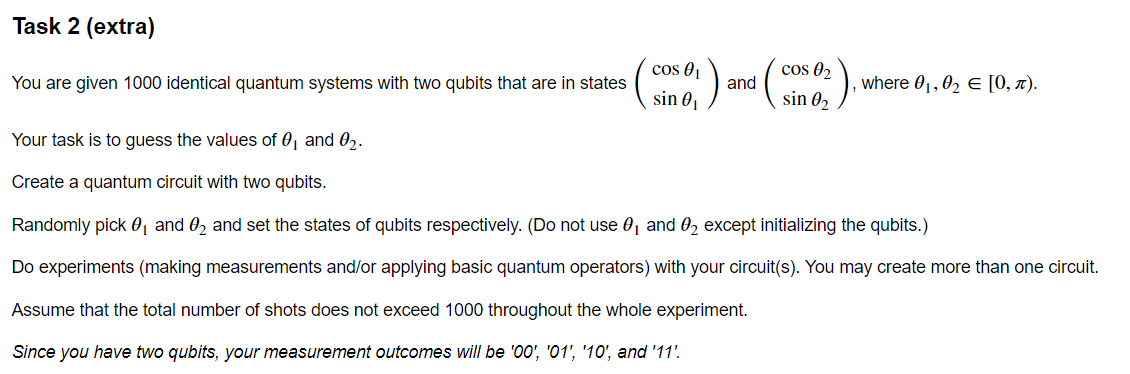

### Approach:

Given 

$ \vert q_0 \rangle = \begin{bmatrix} \cos\alpha \\ \sin\alpha \end{bmatrix} $
$ \vert q_1 \rangle = \begin{bmatrix} \cos\beta \\ \sin\beta \end{bmatrix}$


Therefore

$$
\vert q_0 \rangle  \otimes \vert q_1 \rangle = \begin{bmatrix} \cos\alpha \\ \sin\alpha \end{bmatrix} \otimes \begin{bmatrix} \cos\beta \\ \sin\beta \end{bmatrix} = 
\begin{bmatrix} \cos\alpha . \cos\beta \\ 
\cos\alpha . \sin\beta \\
\sin\alpha . \cos\beta \\
\sin\alpha . \sin\beta \\
\end{bmatrix} = \vert q_0q_1 \rangle
$$


Thus measurement probability should be: 
$$
P(\vert 00 \rangle) = \cos^2\alpha . \cos^2\beta = x   \\ 
P(\vert 01 \rangle) = \cos^2\alpha . \sin^2\beta = y   \\
P(\vert 10 \rangle) = \sin^2\alpha . \cos^2\beta = z   \\
P(\vert 11 \rangle) = \sin^2\alpha . \sin^2\beta = w   \\
$$


```
Quantum_State_1 = [cosA, sinA]
Quantum_State_2 = [cosB, sinB]

sqrt('00') = cosAcosB
sqrt('01') = cosAsinB
sqrt('10') = sinAcosB
sqrt('11') = sinAsinB

sinAcosB + cosAsinB = sin(A+B)
sinAcosB - cosAsinB = sin(A-B)
cosAcosB - sinAsinB = cos(A+B)
cosAcosB + sinAsinB = cos(A-B)

[(A+B) + (A-B)]/2 = A
[(A+B) - (A-B)]/2 = B
```

Secret or unknown angle A:  1.52  Radians or  87.08958485988514  Degrees
Secret or unknown angle B:  0.64  Radians or  36.66929888837269  Degrees


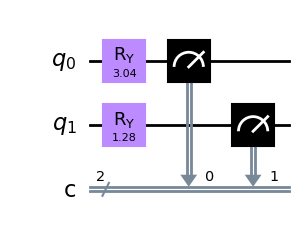

In [14]:
import numpy as np
import random
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram 

# Select two hidden, unknown angles => Initial States of 2 qubits
secret_A = np.around(random.uniform(0,math.pi),2)
secret_B = np.around(random.uniform(0,math.pi),2)

print("Secret or unknown angle A: ", secret_A," Radians or ",(secret_A*180/math.pi)," Degrees") 
print("Secret or unknown angle B: ", secret_B," Radians or ",(secret_B*180/math.pi)," Degrees")

# Prepare circuit
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q,c)
# apply rotations
qc.ry(2*secret_A,q[0])
qc.ry(2*secret_B,q[1])
qc.measure(q,c)
# Draw Circuit
qc.draw("mpl")


In [15]:
# Execute Trial for 900 Shots
job = execute(experiments=qc, backend=Aer.get_backend("qasm_simulator"),shots=900)
counts = job.result().get_counts(qc)
print(counts)

{'01': 550, '11': 345, '00': 3, '10': 2}


In [16]:
print(counts)

# Titrations with 900 Shots
my_approximation_A = 0
my_approximation_B = 0

# --------------------------------------------------
# sqrt('00') = cosAcosB
# sqrt('01') = cosAsinB
# sqrt('10') = sinAcosB
# sqrt('11') = sinAsinB

if counts.get('00')==None: cosAcosB = 0 
else: cosAcosB = counts.get('00') / 900.0  # NEED TO NORMALIZE

if counts.get('01')==None: cosAsinB = 0 
else: cosAsinB = counts.get('01') / 900.0  # NEED TO NORMALIZE

if counts.get('10')==None: sinAcosB = 0 
else: sinAcosB = counts.get('10') / 900.0  # NEED TO NORMALIZE
    
if counts.get('11')==None: sinAsinB = 0 
else: sinAsinB = counts.get('11') / 900.0  # NEED TO NORMALIZE

cosAcosB = np.sqrt(cosAcosB)
cosAsinB = np.sqrt(cosAsinB)
sinAcosB = np.sqrt(sinAcosB)
sinAsinB = np.sqrt(sinAsinB)


print("cosAcosB = ",cosAcosB)
print("cosAsinB = ",cosAsinB)
print("sinAcosB = ",sinAcosB)
print("sinAsinB = ",sinAsinB)
print()

# --------------------------------------------------
#sinAcosB + cosAsinB = sin(A+B)
#sinAcosB - cosAsinB = sin(A-B)
#cosAcosB - sinAsinB = cos(A+B)
#cosAcosB + sinAsinB = cos(A-B)

sin_of_A_plus_B  = sinAcosB + cosAsinB
sin_of_A_minus_B = sinAcosB - cosAsinB
cos_of_A_plus_B  = cosAcosB - sinAsinB
cos_of_A_minus_B = cosAcosB + sinAsinB

print("sin_of_A_plus_B = ",sin_of_A_plus_B)
print("sin_of_A_minus_B = ",sin_of_A_minus_B)
print("cos_of_A_plus_B = ",cos_of_A_plus_B)
print("cos_of_A_minus_B = ",cos_of_A_minus_B)
print()


# --------------------------------------------------
# DOMAIN OF SINE inverse is [-1,1]
# DOMAIN OF COS inverse is [-1,1]
# DOMAIN OF TAN inverse is (-Inf,Inf)
A_plus_B  = np.arcsin(sin_of_A_plus_B)  
A_minus_B = np.arcsin(sin_of_A_minus_B)

#A_plus_B  = np.arccos(cos_of_A_plus_B)
#A_minus_B = np.arccos(cos_of_A_minus_B)

print("A_plus_B = ",A_plus_B)
print("A_minus_B = ",A_minus_B)
print()

# --------------------------------------------------

# [(A+B) + (A-B)]/2 = A
my_approximation_A = (A_plus_B + A_minus_B) / 2


#[(A+B) - (A-B)]/2 = B
my_approximation_B = (A_plus_B - A_minus_B) / 2


print("Approximation of A: ",my_approximation_A," Radians == ",(my_approximation_A*180/math.pi))
print("Approximation of B: ",my_approximation_B," Radians == ",(my_approximation_B*180/math.pi))

print("Secret or unknown angle A: ", secret_A," Radians or ",(secret_A*180/math.pi)," Degrees") 
print("Secret or unknown angle B: ", secret_B," Radians or ",(secret_B*180/math.pi)," Degrees")

{'01': 550, '11': 345, '00': 3, '10': 2}
cosAcosB =  0.05773502691896258
cosAsinB =  0.7817359599705717
sinAcosB =  0.04714045207910317
sinAsinB =  0.6191391873668903

sin_of_A_plus_B =  0.8288764120496748
sin_of_A_minus_B =  -0.7345955078914685
cos_of_A_plus_B =  -0.5614041604479277
cos_of_A_minus_B =  0.6768742142858529

A_plus_B =  0.9770962406715342
A_minus_B =  -0.8250703367061925

Approximation of A:  0.07601295198267088  Radians ==  4.355221336937625
Approximation of B:  0.9010832886888633  Radians ==  51.62826943164022
Secret or unknown angle A:  1.52  Radians or  87.08958485988514  Degrees
Secret or unknown angle B:  0.64  Radians or  36.66929888837269  Degrees
